# Interacting with api explore. 
En este proyecto se buscará explorar el uso de apis, así como los métodos de python para su manipulación.

## Paso 1. Variables de entorno

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import seaborn as sns

# load the .env file variables
load_dotenv()

# Obtener credenciales
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv("CLIENT_SECRET")

## Paso 2. Inicializar librería de Spotify

In [21]:

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

## Paso 3. Realizar solicitud a la API

In [22]:
# Buscar artista
artist_name = "The Doors"
results = sp.search(q=f"artist:{artist_name}", type='artist')
artist = results['artists']['items'][0]
artist_id = artist['id']
print(f"Found Artist: {artist['name']}")

# Obtener tracks
top_tracks = sp.artist_top_tracks(artist_id)
info_tracks = []
for track in top_tracks['tracks']:
    #print(track)
    info_tracks.append({
        "name" : track['name'],
        "popularity" : track['popularity'],
        "duration" : track['duration_ms']
    })
print(f"{info_tracks}")

Found Artist: The Doors
[{'name': 'Riders on the Storm', 'popularity': 77, 'duration': 434720}, {'name': 'People Are Strange', 'popularity': 76, 'duration': 130173}, {'name': 'Roadhouse Blues', 'popularity': 75, 'duration': 243826}, {'name': 'Break on Through (To the Other Side)', 'popularity': 74, 'duration': 145866}, {'name': 'Light My Fire', 'popularity': 73, 'duration': 429760}, {'name': 'Love Her Madly', 'popularity': 71, 'duration': 198466}, {'name': 'Love Me Two Times', 'popularity': 68, 'duration': 195106}, {'name': 'Soul Kitchen', 'popularity': 69, 'duration': 213000}, {'name': 'Peace Frog', 'popularity': 69, 'duration': 170132}, {'name': 'Touch Me', 'popularity': 68, 'duration': 190253}]


## Paso 4. Transformar a pandas DataFrame

In [23]:
df = pd.DataFrame(info_tracks)
df

,name,popularity,duration
0,Riders on the Storm,77,434720
1,People Are Strange,76,130173
2,Roadhouse Blues,75,243826
3,Break on Through (To the Other Side),74,145866
4,Light My Fire,73,429760
5,Love Her Madly,71,198466
6,Love Me Two Times,68,195106
7,Soul Kitchen,69,213000
8,Peace Frog,69,170132
9,Touch Me,68,190253


## Paso 5. Analizar relación estadística 

/tmp/ipykernel_1193/2801297123.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


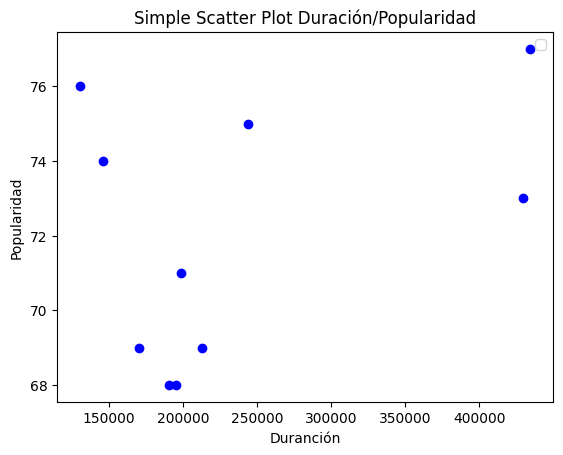

In [24]:
# TODO: Code
# Se realizar un scatter plot para visualizar los datos

x = df["duration"].to_numpy()
y = df["popularity"].to_numpy()

plt.scatter(x, y, color='blue')

plt.xlabel("Duranción")
plt.ylabel("Popularidad")
plt.title("Simple Scatter Plot Duración/Popularidad")

#plt.xlim(0, )

plt.legend()
plt.show()

### Observaciones (Scatter Plot):  
En el gráfico anterior se puede observar una posible relación, por lo que se validará con una matriz de correlación.

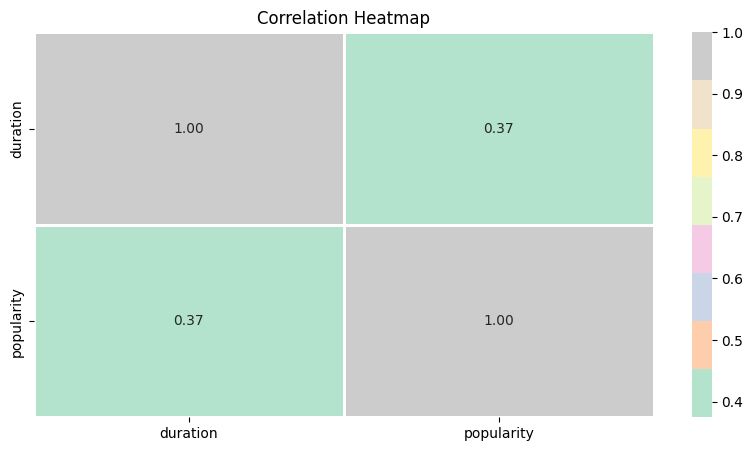

In [25]:
# Matriz de correlación
df_dp = df[['duration', 'popularity']]

plt.figure(figsize=(10, 5))
sns.heatmap(df_dp.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### Observaciones (matriz de correlación):  
Al obtener los valores de correlación entre las variables "Popularity" y "Duration", se puede observar una `correlación débil de 0.37`, aunque es mínima, existe una pequeña relación entre ambas variables, sería interesante realizar el análisis con muchos más datos.